Anzahl der Knoten: 3425
Anzahl der Kanten: 37594


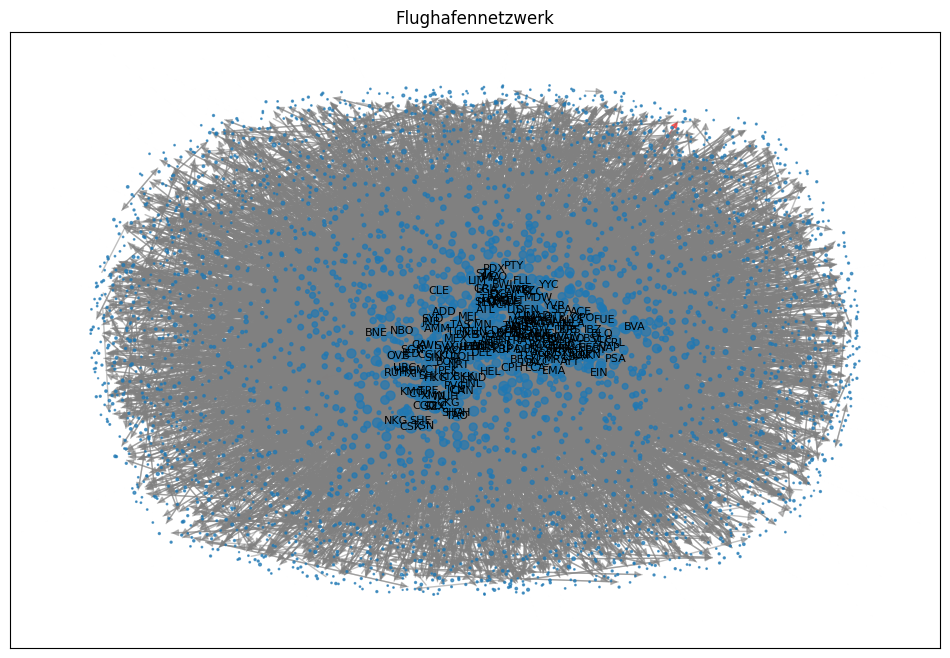

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Daten einlesen
data = pd.read_csv('../data/flughafen_netzwerk_zusammenfassung.csv')

# Daten für Graphen vorbereiten
edges = data[['source_airport', 'destination_airport', 'airline', 'stops']]

# Graphen erstellen
G = nx.DiGraph()

# Kanten mit Attributen hinzufügen
for index, row in edges.iterrows():
    G.add_edge(
        row['source_airport'], 
        row['destination_airport'], 
        airline=row['airline'], 
        stops=row['stops']
    )

# Kurze Analyse
print(f"Anzahl der Knoten: {G.number_of_nodes()}")
print(f"Anzahl der Kanten: {G.number_of_edges()}")

# Knoten- und Kanteneigenschaften berechnen
degree = dict(G.degree())
stops = nx.get_edge_attributes(G, 'stops')

# Beispielhafte Visualisierung
plt.figure(figsize=(12, 8))

# Layout basierend auf spring_layout für bessere Übersichtlichkeit
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Knoten zeichnen
nx.draw_networkx_nodes(G, pos, node_size=[v * 0.5 for v in degree.values()], alpha=0.7)

# Kanten zeichnen (Farbe unterscheidet Stops)
nx.draw_networkx_edges(G, pos, edge_color=["red" if stops[e] > 0 else "gray" for e in G.edges()], alpha=0.5)

# Wichtige Knoten beschriften (z.B. Hubs mit hohem Grad)
hub_nodes = [node for node, deg in degree.items() if deg > 100]
nx.draw_networkx_labels(G, pos, labels={node: node for node in hub_nodes}, font_size=8)

plt.title('Flughafennetzwerk')
plt.show()
